In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Le dataset 'CIFAR-10' se compose de 60 000 images couleur de 32x32 pixels réparties en 10 classes, avec 6 000 images par classe.

Il y a 50 000 images d'entraînement et 10 000 images de test.

In [2]:
#Charger les données
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 14s 0us/step


In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
#Fonction d'affichage des données
def plot_gallery(images):
# Affiche les 12 premières images contenues dans images
# images est de taille Nb image*Ny*Nx
    plt.figure(figsize=(7.2, 7.2))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(30):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.show()

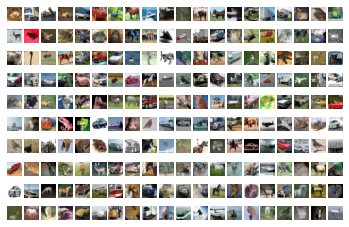

In [6]:
#Afficher les 200 premieres images
from matplotlib import pyplot as plt
for i in range(200):
 plt.subplot(10,20,i+1)
 plt.imshow(X_train[i,:])
 plt.axis('off')
plt.show()

In [7]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [8]:
#Redimensionnement des données
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
y_train.shape,y_test.shape

((50000,), (10000,))

In [9]:
classes =['airplane','automobile'	,'bird','cat','deer','dog'	,'frog'	,'horse','ship'	,'truck']

In [10]:
classes[1]

'automobile'

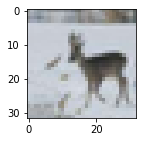

In [11]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[20])

In [12]:
# Afficher une seules image avec sa classe
def afficher_image(X,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

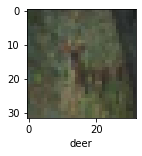

In [13]:
afficher_image(X_train,y_train,10)

In [14]:
#convertir les donées en flottants de 32 bits
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


In [15]:
X_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [16]:
#fonction d'affichage des graphes
def affiche(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [17]:
print("nombre d'images en train : ", len(X_train))
print("nombre d'images en test : ", len(X_test))

print("la taille des images est : ", len(X_train[0]),'x',len(X_train[0][0]),"pixels")

print("Nombre de  de classes : ", len(classes))

nombre d'images en train :  50000
nombre d'images en test :  10000
la taille des images est :  32 x 32 pixels
Nombre de  de classes :  10


In [18]:
#Convertir les labels des variables en vecteurs binaires, où chaque vecteur a une longueur de 10
import tensorflow as tf
Y_train = tf.keras.utils.to_categorical(y_train, 10)
Y_test = tf.keras.utils.to_categorical(y_test, 10)



In [19]:
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Conv2DTranspose, Reshape, Dense, Activation, Flatten, Dropout, Convolution2D, MaxPooling2D, Input

# Définition du réseau
inputs = Input(shape=(32,32,3)) 
x = inputs
x = Convolution2D(32, kernel_size = (3, 3), activation='relu' )(x) 
x = Convolution2D(64, kernel_size = (3, 3), activation='relu' )(x) 
x = MaxPooling2D((3, 3))(x) 
x = Flatten()(x) 
x = Dense(256, activation='relu')(x)  
outputs= Dense(10, activation='softmax')(x) 
model = Model(inputs, outputs) 
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5184)              0         
                                                                 
 dense (Dense)               (None, 256)               1327360   
                                                             

Epoch 1/26
196/196 [==============================] - 15s 20ms/step - loss: 1.7371 - accuracy: 0.3833 - val_loss: 1.6301 - val_accuracy: 0.4414
Epoch 2/26
196/196 [==============================] - 3s 16ms/step - loss: 1.3032 - accuracy: 0.5446 - val_loss: 1.2857 - val_accuracy: 0.5385
Epoch 3/26
196/196 [==============================] - 3s 15ms/step - loss: 1.1139 - accuracy: 0.6132 - val_loss: 1.1934 - val_accuracy: 0.5827
Epoch 4/26
196/196 [==============================] - 3s 16ms/step - loss: 0.9771 - accuracy: 0.6635 - val_loss: 1.0239 - val_accuracy: 0.6444
Epoch 5/26
196/196 [==============================] - 3s 17ms/step - loss: 0.8688 - accuracy: 0.6997 - val_loss: 1.1306 - val_accuracy: 0.6257
Epoch 6/26
196/196 [==============================] - 3s 15ms/step - loss: 0.7697 - accuracy: 0.7339 - val_loss: 1.0847 - val_accuracy: 0.6371
Epoch 7/26
196/196 [==============================] - 4s 18ms/step - loss: 0.6716 - accuracy: 0.7673 - val_loss: 0.9206 - val_accuracy: 0.687

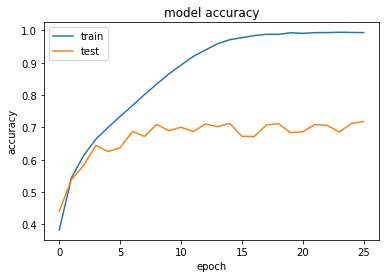

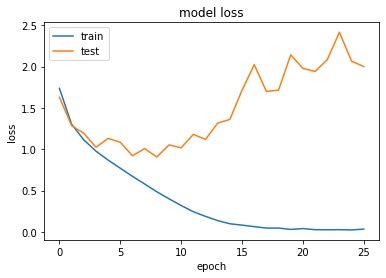

lr= 0.13 batch_size= 256 epochs= 26
Temps d apprentissage 144.523571886


In [20]:
import time

#Apprentissage

lr= 0.13
batch_size=256
epochs=26
sgd1= tf.keras.optimizers.SGD(learning_rate=lr,momentum=0.9)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
tps1 = time.perf_counter()
history =model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
verbose=1,validation_data=(X_test, Y_test))
tps2 = time.perf_counter()
affiche(history) #donnee en annexe
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs)
print('Temps d apprentissage',tps2 - tps1)

In [21]:
#Evaluation du modèle
from sklearn.metrics import confusion_matrix


score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)


Test loss: 2.001481056213379
Test accuracy: 71.82000279426575


Conclusion :

*   le modèle a obtenu une perte de 1.51 et une précision de 53.1% sur le X_test : il  a bien classifié 53.1 % des images de notre dataset.
*   Pour ameliorer la precision on peut ajouter des couches de convolutions et des neurones dans le réseau.





In [22]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[6.08792172e-16, 3.93757639e-16, 3.33580429e-12, 9.99998569e-01,
        2.79323370e-10, 1.24509496e-08, 1.41646569e-06, 3.02604175e-17,
        2.09623117e-12, 1.89250221e-15],
       [2.94094473e-08, 9.02317837e-03, 6.80177628e-20, 1.75571565e-24,
        7.93662269e-21, 1.49590709e-22, 2.26347796e-21, 3.96531663e-23,
        9.90976810e-01, 5.37092426e-10],
       [7.18831586e-07, 4.14353155e-04, 9.45675094e-09, 1.55236606e-07,
        8.45758810e-11, 4.91654504e-08, 3.80790539e-14, 2.77713651e-11,
        9.93440092e-01, 6.14454271e-03],
       [9.37127829e-01, 1.07737395e-10, 1.57588829e-07, 6.93587202e-11,
        9.47223723e-12, 7.27466575e-19, 2.19797863e-16, 1.98324784e-16,
        6.28720298e-02, 1.02289506e-18],
       [1.09532898e-20, 1.39456749e-16, 1.40326621e-08, 1.31659829e-06,
        5.81012666e-03, 9.29880630e-14, 9.94188547e-01, 2.46329802e-15,
        2.57683114e-15, 6.51751407e-15]], dtype=float32)

In [29]:
np.argmax([12,10,100,4])

2

In [35]:
#pour trouver l'index du maximum du resultat de la soft max
y_pred_classes = [np.argmax(element) for element in y_pred]
y_classes[:20]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6]

In [36]:
y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

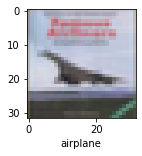

In [38]:
afficher_image(X_test, y_test,3)

In [39]:
classes[y_classes[3]]

'airplane'

In [41]:
from sklearn.metrics import classification_report

print("classification report : \n", classification_report(y_test,y_pred_classes))

classification report : 
               precision    recall  f1-score   support

           0       0.74      0.77      0.75      1000
           1       0.84      0.82      0.83      1000
           2       0.60      0.64      0.62      1000
           3       0.55      0.53      0.54      1000
           4       0.68      0.65      0.67      1000
           5       0.62      0.59      0.60      1000
           6       0.76      0.83      0.79      1000
           7       0.78      0.76      0.77      1000
           8       0.82      0.83      0.82      1000
           9       0.79      0.77      0.78      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000

